## Библиотека `NumPy` : часть 2

### Урок 4.1: Изменение размерности списков

Импортируем библиотеку `NumPy`:

In [1]:
import numpy as np

Представим, что у нас есть массив оценок студентов `scores`:

In [2]:
scores = np.array([3, 5, 7, 9, 8, 10])
scores

array([ 3,  5,  7,  9,  8, 10])

И мы узнаём, что эти оценки должны быть записаны парами: студенты выполняли проект вдвоём, но оценки получили по отдельности по результатам защиты проекта. Как разбить шесть значений в массиве на маленькие списки по два значения? Воспользоваться методом `.reshape()`, который позволяет поменять форму массива.

In [3]:
pairs = scores.reshape(3, 2)
pairs

array([[ 3,  5],
       [ 7,  9],
       [ 8, 10]])

**Важно:** теперь изменилась не только форма массива, но и его размерность – запросим число измерений массива `pairs`:

In [4]:
pairs.ndim

2

In [5]:
scores.ndim  # сравним

1

Теперь массив двумерный, и чтобы обратиться к элементу массива, нам нужно указывать две вещи: индекс списка и индекс элемента в этом списке. Метод `.reshape()` удобен, но при его использовании стоит помнить, что не любой массив можно превратить в массив другой формы – общее число элементов в массиве должно позволять получить новое число списков и элементов в них. Так, массив `pairs`, в котором всего 6 элементов, нельзя превратить в массив вида `(2, 4)` (таблица $2 \times 4$), потому что для такой формы понадобится 8 элементов! И Python явно об этом сообщит:

In [16]:
pairs.reshape(2, 4)

ValueError: cannot reshape array of size 6 into shape (2,4)

Если нам нужно просто поменять местами строки и столбцы в таблице, то есть списки в массиве, можно воспользоваться транспонированием, которое осуществляется в `NumPy` с помощью метода `.transpose()`:

In [17]:
# было
pairs

array([[ 3,  5],
       [ 7, 10],
       [ 8,  9]])

In [6]:
# стало
T = pairs.transpose() 
T

array([[ 3,  7,  8],
       [ 5,  9, 10]])

Кроме того, в противоположность `.reshape()`, который часто используется для разбиения одномерного массива на многомерный из нескольких маленьких списков, в `NumPy` существует «обратный» метод `.ravel()`, который позволяет любой многомерный массив превратить в одномерный, состоящий из одного списка, другими словами, сделать массив «плоским»:

In [49]:
pairs.ravel()

array([ 5,  4, 10,  7,  8,  8])

*Примечание:* в `NumPy` есть ещё другой метод для создания «плоских» массивов – `flatten()`.

На этом мы закончим обсуждать изменение размерности списков, а в следующем уроке поговорим об изменении элементов списков.

In [1]:
### Урок 4.2: изменение списков

In [2]:
import numpy as np
scores = np.array([3, 5, 7, 9, 8, 10])
pairs = scores.reshape(3, 2)

В прошлом модуле мы довольно подробно посмотрели, как можно обращаться к элементам массива или даже к группе элементов, используя срезы, а сейчас мы посмотрим на то, каким образом элементы можно изменять. Возьмём массив `pairs` из предыдущего урока, который содержит оценки пар студентов:

In [4]:
pairs

array([[ 3,  5],
       [ 7,  9],
       [ 8, 10]])

Представим, что при внесении оценки первого студента мы ошиблись, и там на самом деле должна стоять оценка 3. Поправим: обратимся к этому элементу (это мы уже умеем делать), а далее присвоим ему новое значение:

In [6]:
pairs[0][0] = 3
pairs

array([[ 3,  5],
       [ 7,  9],
       [ 8, 10]])

Обратите внимание: у нас получилось изменить массив, не перезаписывая его полностью в переменную `pairs`, а только поправив один элемент. Это возможно, потому что массивы `NumPy` в Python – это изменяемые объекты. Изменяемость как раз и заключается в том, что мы можем изменить объект «как есть», не присваивая новый результат переменной с таким же названием. Это удобно, но иногда может вызывать проблемы. 

Представим, что мы хотим написать отчёт об ошибке в массиве `pairs` (ошибке в ведомости с оценками), и нам нужно предоставить старый массив и исправленный массив. Мы создаем массив `pairs2` и изменяем в нём значение первого элемента:

In [8]:
pairs2 = pairs
pairs2[0][0] = 4
pairs2

array([[ 4,  5],
       [ 7,  9],
       [ 8, 10]])

Если мы «скопировали» массив `pairs` в массив `pairs2` как в коде выше, через присваивание, нас будет ждать сюрприз:

In [10]:
print(pairs)
print(pairs2)

[[ 4  5]
 [ 7  9]
 [ 8 10]]
[[ 4  5]
 [ 7  9]
 [ 8 10]]


При изменении массива `pairs2`, массив `pairs` тоже изменился! Это тоже связано с тем, что массивы является изменяемыми объектами в Python. Поэтому, когда мы записываем что-то через присваивание (`=`), мы на самом деле создаем не новый объект, не копию, а просто ссылку на старый. Можно провести аналогию с созданием новой папки и ярлыка: при присваивании через `=` мы создаем «ярлык», просто ссылку на старый объект, а при непосредственном копировании мы создаем «папку», то есть новый объект. Копирование массива осуществляется с помощью метода `.copy()`:

In [12]:
pairs3 = pairs2.copy()
pairs3[2][1] = 9
print(pairs2)
print(pairs3)

[[ 4  5]
 [ 7  9]
 [ 8 10]]
[[4 5]
 [7 9]
 [8 9]]


Также скопировать массив можно, сделав его полный срез:

In [14]:
pairs4 = pairs3[:]
pairs4

array([[4, 5],
       [7, 9],
       [8, 9]])

Посмотреть, насколько копия, созданная с помощью полного среза, является полноценной копией, и изменяется ли при её редактировании «оригинал», слушателям предлагается самостоятельно.

Раз уже заговорили о срезах, давайте посмотрим, как изменить сразу несколько списков в массиве. Например, заменить в `pairs` первые два списка:

In [17]:
pairs[0:2] = [[5, 4], [9, 7]]

In [18]:
pairs

array([[ 5,  4],
       [ 9,  7],
       [ 8, 10]])

На этом с изменением элементов массивов мы закончим, а в следующей части поговорим о создании новых массивов на основе старых с помощью генераторов списков и циклов.

### Урок 4.3: создание новых списков на основе старых

Создадим небольшой массив со значениями дохода двух групп людей:

In [22]:
income = np.array([[20000, 30000, 25000, 700000],
                  [23000, 35000, 20000, 32000]])

Теперь представим, что нам нужно получить массив с логарифмированными значениями дохода (так часто делают, потому что при переходе к логарифмам разброс значений в списке снижается, но природа данных не меняется). Сделать это довольно просто: мы уже обсуждали, как использовать функцию `np.log()` для нахождения натурального логарифма числа, а теперь применим её сразу ко всему массиву:

In [24]:
np.log(income)  # готово

array([[ 9.90348755, 10.30895266, 10.1266311 , 13.45883561],
       [10.04324949, 10.46310334,  9.90348755, 10.37349118]])

Теперь давайте немного поговорим о логарифмировании. Преобразование исходной шкалы измерения к логарифмической (здесь мы привели значения дохода в рублях к их натуральным логарифмам) часто используется для визуализации и анализа данных. Давайте сравним два графика. На обоих графиках по горизонтальной оси будет идти номер наблюдения (номер человека в массиве `income`, восемь человек – целые значения от 0 до 7), а по вертикальной оси на первом графике будут идти исходные значения дохода, а на втором – логарифмированные.

Мы пока не обсуждали графику в Python, далее у вас будет целый модуль, посвящённый визуализиации с помощью `matplotlib`, но, тем не менее, давайте построим графики с помощью этой библиотеки, не вдаваясь в детали кода.

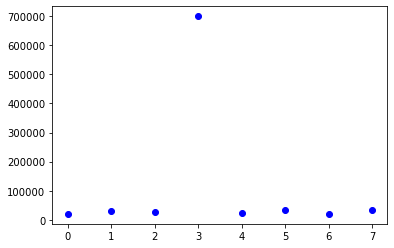

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(np.arange(8), income.flatten(), 'bo')

*Краткие комментарии по коду:*

* `%matplotlib inline` – магическая строка (это официальное название, *magic line*), которая сообщает Jupyter, что график должен быть построен прямо в этом ipynb-файле, не в отдельном окне, и отображён явно, сразу после ячейки с кодом;

* во второй строке из библиотеки `matplotlib` мы импортируем модуль `pyplot` с сокращённым названием `plt`;

* в функции `plot()` мы сначала указываем значения по оси `x` (номер наблюдения в нашем случае, сгенерированный с помощью `arange()`), а затем – значения по оси `y` (значения дохода, которые мы превратили в «плоский» массив);

* опция `bo` отвечает за цвет и тип маркера для точек: `b` – от *blue*, синие точки, `o` – круглые точки.

Аналогичным образом построим график для логарифмированных значений дохода:

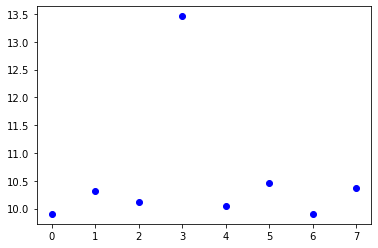

In [29]:
plt.plot(np.arange(8), np.log(income).flatten(), 'bo')

По первому графику сложно делать какие-то выводы. Из-за того, что одна точка сильно отличается от остальных, картинка получается очень растянутой, и кажется, что все значения дохода, кроме самого большого, находятся примерно на одном уровне – менее 100 тысяч. Это, конечно, правда, все значения в `income`, кроме одного, менее 100 тысяч, но понять, насколько сильно одно значение отличается от другого, по такому графику сложновато. На втором графике картина меняется: теперь разница между значениями дохода более заметна. Например, по графику чётко видно, что доход второго человека в массиве выше, чем у первого, но ниже, чем у третьего, доходы третьего и пятого человека совпадают, и так далее. При этом важно, что при логарифмировании порядок значений, «природа» данных сохранилась: что в исходном массиве `income` минимальная заработная плата была у шестого человека, а максимальная – у четвёртого, то осталось и в новом массиве.

От содержательных аспектов визуализации и анализа данных давайте вернёмся к техническим и посмотрим, как создавать новые списки на основе старых. Причём сейчас речь пойдёт именно о списках Python, о структуре данных, которая называется *list* (иногда слова «список» и массив в программировании отождествляют, но сейчас мы поговорим о списке в узком смысле). Допустим, у нас есть список, и мы хотим возвести его значения в квадрат: 

In [32]:
L = [2, 6, 7, 1]
L ** 2 # не получается

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Ничего не получилось. Как быть? В таких случаях нам пригодятся специальные конструкции – генераторы списков или списковые включения (*list comprehensions*). Давайте сначала запишем код, а потом разберём его по частям.

In [34]:
L_sq = [i ** 2 for i in L]
L_sq

[4, 36, 49, 1]

Для тех, кто знаком с циклами, строка кода выше могла показаться знакомой. Действительно, в этой задаче мы как раз сталкиваемся с необходимостью выполнять повторяющиеся действия – возводить в квадрат каждый элемент списка `L` по очереди. Как устроена приведённая выше конструкция?

* Часть `i ** 2`: каким-то образом мы обозначаем элемент списка, с которым мы будем работать (список, по которому мы будем «бегать», переходя от одного элемента к другому), и указываем, какое действие с этим элементом надо сделать; здесь мы назвали  элемент `i` и сообщили, что его нужно будет возводить в квадрат.

* Часть `for i in L`: указываем, по какому списку мы будем «бегать», переходя от одного элемента к другому, чтобы достичь цели – возвести все элементы интересующего нас списка в квадрат; расшифровывается как «для каждого элемента `i` в списке `L`сделай что-то».

* Обе части вместе: сначала указываем, что с элементом старого списка нужно сделать, потом – с каким списком мы работаем; затем, так как результат выполнения операций – новый список, заключаем всю конструкцию в квадратные скобки.

Давайте для закрепления рассмотрим ещё несколько примеров.

In [36]:
L_log = [np.log(num) for num in L ]
L_log

[0.6931471805599453, 1.791759469228055, 1.9459101490553132, 0.0]

In [37]:
L_sqrt = [np.sqrt(j) for j in L]
L_sqrt

[1.4142135623730951, 2.449489742783178, 2.6457513110645907, 1.0]

### Урок 4.4: дополнительные концепции `NumPy`

### Вычисления

Создадим массив `M` из последовательности чисел (вспомним про `arange()`):

In [40]:
M = np.arange(1, 10, 0.003)
M

array([1.   , 1.003, 1.006, ..., 9.991, 9.994, 9.997])

Округление:

In [42]:
np.round(M)  # до целого

array([ 1.,  1.,  1., ..., 10., 10., 10.])

In [43]:
np.round(M, 1)  # до 1го знака 

array([ 1.,  1.,  1., ..., 10., 10., 10.])

In [44]:
np.round(M, 2)

array([ 1.  ,  1.  ,  1.01, ...,  9.99,  9.99, 10.  ])

Возьмём массив поинтереснее с точки зрения округления:

In [46]:
A = np.array([2.5, 2.7, 8.1, 9.25])
A

array([2.5 , 2.7 , 8.1 , 9.25])

In [47]:
np.floor(A)  # в меньшую сторону

array([2., 2., 8., 9.])

In [48]:
np.ceil(A)  # в большую сторону

array([ 3.,  3.,  9., 10.])

Добавим ко всем элементам `A` 2:

In [50]:
np.add(A, 2)

array([ 4.5 ,  4.7 , 10.1 , 11.25])

А теперь вычтем 1:

In [52]:
np.subtract(A, 1)

array([1.5 , 1.7 , 7.1 , 8.25])

Суммируем все значения:

In [102]:
np.sum(A)

22.55

Или найдём их произведения:

In [56]:
np.prod(A)

505.74375

### Урок 4.5: структурированные списки

До этого мы работали с обычными массивами, массивами, где у нас не было никаких меток, которые бы сообщали, что именно содержится в том или ином списке: возраст человека, его доход, пол и прочее. Мы уже заранее знали, что, например, в массиве `scores` сохранены оценки студентов и больше ничего. Кроме того, мы не могли бы включить в список имена студентов как есть, ведь массив не может содержать элементы разных типов, в нашем случае, целые числа и строки. Как быть? Можно создать структурированный массив или структурированный список (*structured array*). 

Чтобы познакомиться с этой структурой, рассмотрим пример. У нас есть данные по трем людям: имя (строка), возраст (целое число) и рост (число с плавающей точкой). Мы хотим создать массив таким образом, чтобы было понятно, что в нем сохранены именно такие показатели, плюс, чтобы разные типы данных не конфликтовали между собой. Попробуем! 

In [59]:
info = np.array([('Anna', 19, 168), 
                 ('Sam', 33, 175.5), 
                 ('Pam', 23, 180)],
             dtype=[('name', 'U10'), 
                    ('age', int), 
                    ('height', float)])

Для удобства можно думать о массиве `info` как о таблице с данными, в которой есть 3 столбца (`name`, `age`, `height`) и три строки, соответствующие трём респондентам (*Anna*, *Sam*, *Pam*). 

Что приведенный выше код означает? Во-первых, данные по каждому человеку мы записали в виде кортежа – набора элементов в круглых скобках, причем перечислили имя, возраст и рост друг за другом. Каждый кортеж – это одна строка в таблице. Во-вторых, каждому значению в кортеже мы присвоили название: в `dtype` у нас указано три элемента. Первый элемент имеет название или метку `name`, второй – `age`, третий – `height`. 
В-третьих, чтобы Python не привёл все элементы к одному типу (строковый тип, *string*, окажется сильнее, поэтому есть риск превратить все числовые значения в массиве в текст), в `dtype`, помимо названия поля, то есть столбца в таблице, мы указываем его тип. Тип 

Посмотрим на  массив:

In [61]:
info

array([('Anna', 19, 168. ), ('Sam', 33, 175.5), ('Pam', 23, 180. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

In [62]:
print(info)

[('Anna', 19, 168. ) ('Sam', 33, 175.5) ('Pam', 23, 180. )]


Обращаться к элементам структурированного массива можно обычным образом. Так, выведем на экран информацию по Анне, которая у нас находится на первом месте в массиве:

In [64]:
info[0]

('Anna', 19, 168.)

Или информацию по Анне и Сэму сразу, используя срез:

In [66]:
info[0:2]

array([('Anna', 19, 168. ), ('Sam', 33, 175.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

Однако история со структурированными массивами ещё более интересная. Можно отдельно вызывать определенные поля – значения с фиксированной меткой или названием. Так, мы можем запросить значения возраста по всем людям в массиве:

In [68]:
info['age']

array([19, 33, 23])

Или пары возраст-рост:

In [70]:
info[['age', 'height']]  # названия оформлены в виде списка - в []

array([(19, 168. ), (33, 175.5), (23, 180. )],
      dtype={'names':['age','height'], 'formats':['<i4','<f8'], 'offsets':[40,44], 'itemsize':52})

Отсюда можем получить информацию по первому человеку (Анне):

In [72]:
info[['age', 'height']][0]

(19, 168.)

Или отдельно по второму (Сэм):

In [75]:
info[['age', 'height']][1]

(33, 175.5)

**Дополнение для желающих**

Изменять элементы структурированного массива тоже можно. И логика ничем не отличается от работы с обычными массивами. Заменим третий элемент массива: вместо данных по Пэм запишем данные по Стиву:

In [77]:
info[2] = ('Steve', 34, 172)  # в виде кортежа

In [78]:
info

array([('Anna', 19, 168. ), ('Sam', 33, 175.5), ('Steve', 34, 172. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

А теперь изменим возраст Анны (допустим, мы ошиблись ранее и указали возраст не той Анны):

In [80]:
info['age'][0] = 25
info

array([('Anna', 25, 168. ), ('Sam', 33, 175.5), ('Steve', 34, 172. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

### Урок 4.6: чтение/запись списков

Чтобы было проще работать, сначала обсудим запись списков, тем самым сохранив списки себе на компьютер, а потом будем загружать их в Python. Мотивация: удобно для хранения больших списков с данными + например, для сохранения результатов разных моделей.

Пусть у нас есть массив из предыдущего урока с данными по трем респондентам:

In [86]:
import numpy as np
info = np.array([('Anna', 19, 168), 
                 ('Sam', 33, 175.5), 
                 ('Pam', 23, 180)],
             dtype=[('name', 'U10'), 
                    ('age', int), 
                    ('height', float)])

In [87]:
info

array([('Anna', 19, 168. ), ('Sam', 33, 175.5), ('Pam', 23, 180. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

Запишем его в файл формата `.npy`: сначала укажем название файла, а затем – сам массив, который сохраняем.

In [89]:
np.save("info.npy", info)

Теперь этот файл можно увидеть во вкладке *Home* в Jupyter Notebook, в рабочей папке. Попробуем выполнить обратную операцию: считаем массив из numpy-файла:

In [91]:
np.load("info.npy")

array([('Anna', 19, 168. ), ('Sam', 33, 175.5), ('Pam', 23, 180. )],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

Выгружать списки можно в разные форматы. Например, можно просто сохранить массив в текстовый файл с расширением `.txt`:

In [93]:
ages = np.array([61, 73, 18, 92])

In [94]:
np.savetxt("ages.txt", ages)

И аналогичным образом считать:

In [97]:
np.loadtxt("ages.txt")

array([61., 73., 18., 92.])

Если нет необходимости работать с файлами, можем просто превратить массив в другой объект Python. Например, в обычный список:

In [99]:
info.tolist()

[('Anna', 19, 168.0), ('Sam', 33, 175.5), ('Pam', 23, 180.0)]

Или строку:

In [101]:
np.array2string(info)

"[('Anna', 19, 168. ) ('Sam', 33, 175.5) ('Pam', 23, 180. )]"